In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [51]:
water=pd.read_csv('stark/data/water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
water_gd = water.drop(columns=["ph","Trihalomethanes","Sulfate"])
# df.drop(columns=['points', 'rebounds', 'steals'], inplace=True)
water_gd

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1


In [15]:
water.Potability.unique()


array([0, 1], dtype=int64)

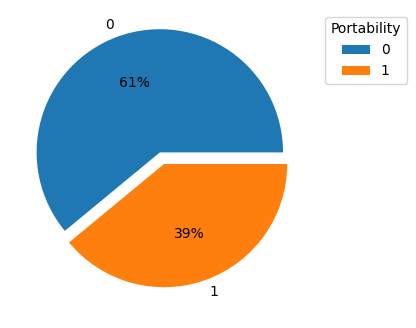

In [17]:
plt.figure(figsize=(4,4), dpi=100)
x = water.Potability.value_counts()
plt.pie(x, labels=x.index, autopct="%.0f%%",  explode=(0.1,0))
plt.legend(title="Portability", bbox_to_anchor=(1,1))

plt.savefig("Portability_Distribution.png")
plt.show()

In [39]:
y = water.isnull().sum()
exp = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
y

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

([<matplotlib.patches.Wedge at 0x28a53bb78b0>,
 [Text(0.5701631246813923, 1.0558948864605564, 'ph'),
  Text(-0.6581900187559184, 1.0033872129990913, 'Hardness'),
  Text(-0.6581900187559184, 1.0033872129990913, 'Solids'),
  Text(-0.6581900187559184, 1.0033872129990913, 'Chloramines'),
  Text(-0.9015574469934698, -0.791955914032225, 'Sulfate'),
  Text(0.9101782357846312, -0.782032978271362, 'Conductivity'),
  Text(0.9101782357846312, -0.782032978271362, 'Organic_carbon'),
  Text(1.1252141758219982, -0.4170048663135977, 'Trihalomethanes'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Turbidity'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Potability')],
 [Text(0.3325951560641455, 0.6159386837686578, '34%'),
  Text(-0.383944177607619, 0.5853092075828032, '0%'),
  Text(-0.383944177607619, 0.5853092075828032, '0%'),
  Text(-0.383944177607619, 0.5853092075828032, '0%'),
  Text(-0.5259085107461907, -0.4619742831854646, '54%'),
  Text(0.5309373042077015, -0.4561859039916278, '0%

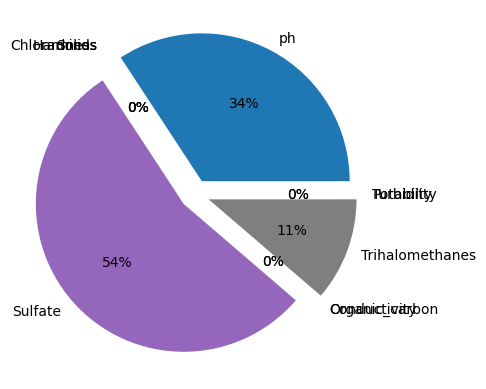

In [20]:
plt.pie(y, labels=y.index, autopct="%.0f%%", explode=exp)

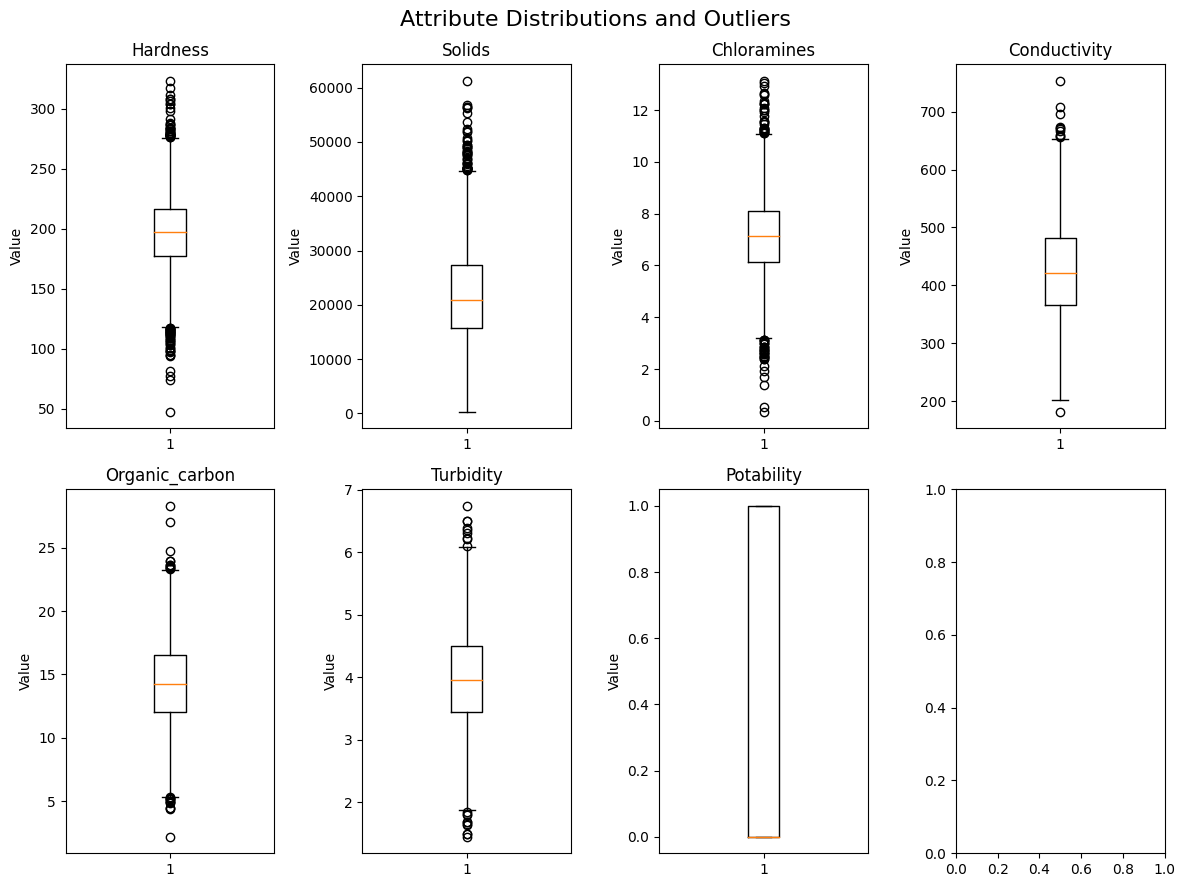

In [21]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Outliers', fontsize=16)
# Iterate over the columns and create box plots
for i, column in enumerate(water_gd.columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(water_gd[column])
    ax.set_title(column)
    ax.set_ylabel('Value')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [29]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


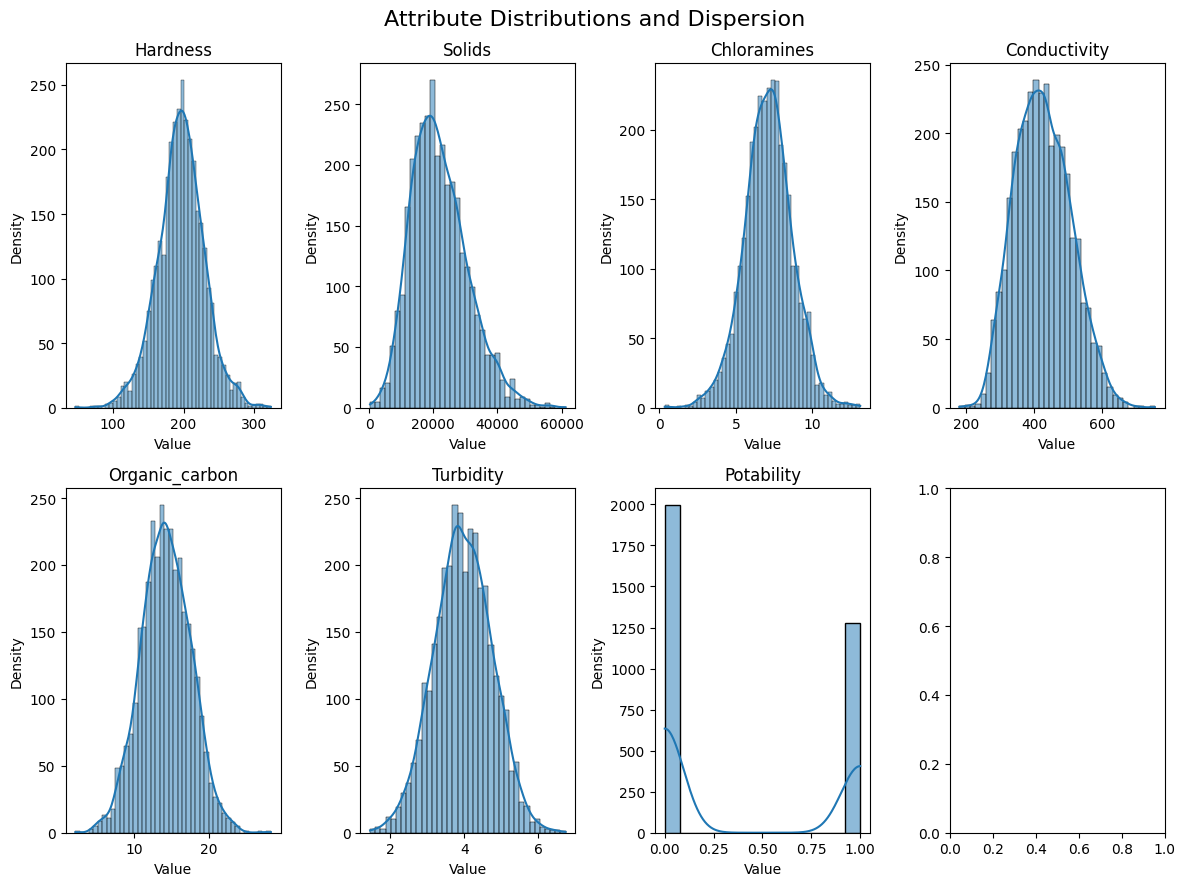

In [42]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Dispersion', fontsize=16)

# Iterate over the columns and create distribution plots
for i, column in enumerate(water_gd.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=water_gd, x=column, kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [44]:
# checking null values
y

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [61]:
water.Sulfate= water.Sulfate.fillna(value=water.Sulfate.median())

In [62]:
water.ph = water.ph.fillna(value=water.ph.median())

In [63]:
water.Trihalomethanes = water.Trihalomethanes.fillna(value=water.Trihalomethanes.median())

In [64]:
Y = water.iloc[:,9:]
X = water.iloc[:,0:9]

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [66]:
model = RandomForestClassifier(n_estimators=350, max_depth=40, max_features=8, criterion="gini", random_state=10)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, pred)*100)

In [ ]:
print(f1_score(Y_test, pred))

In [ ]:
print(confusion_matrix(Y_test, pred))

In [ ]:
sns.heatmap(confusion_matrix(Y_test, pred))

In [ ]:
print(classification_report(Y_test, pred))